In [66]:
from helpers import loadData
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

X, Y = loadData('winequality-red-1.csv')
pca = PCA()
pca.fit(X)
pca.explained_variance_

import seaborn as sns
sns.set_theme(style="ticks")
pdX = pd.DataFrame(X, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
                                 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                                 'alcohol'])
pdY = pd.DataFrame(Y, columns = ['quality'])
pdXY = pd.concat([pdX,pdY], axis = 1, join = 'inner')

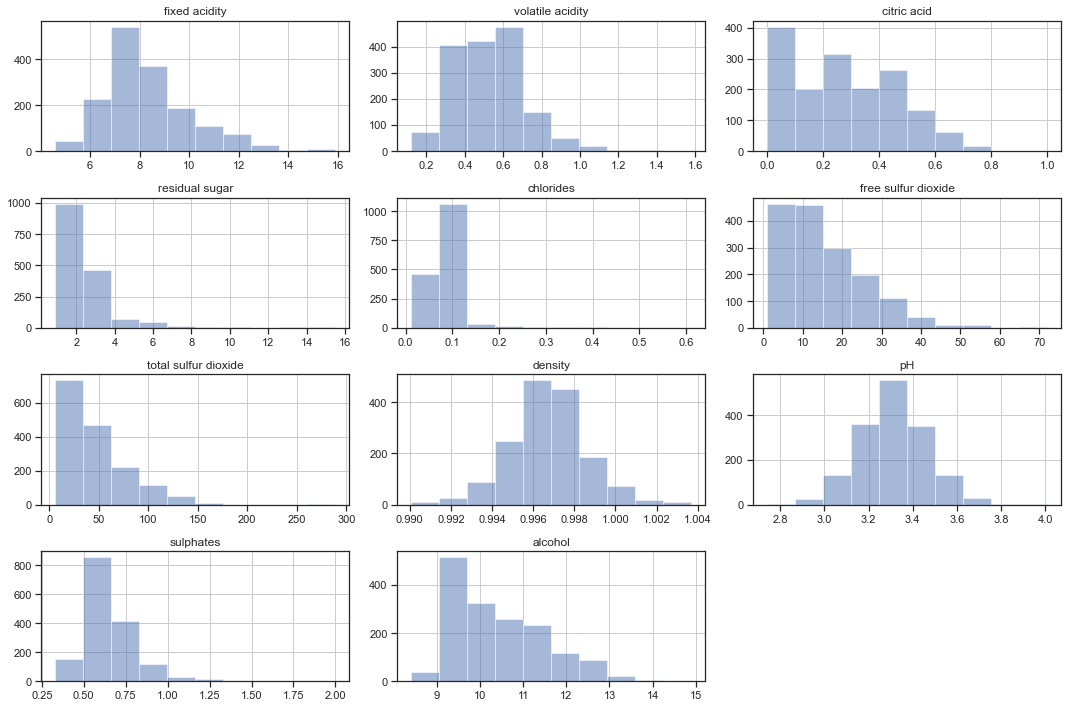

In [67]:
import matplotlib.pyplot as plt 
pdX = pdX.astype(float)
pdX.dtypes
pdX.hist(alpha=0.5, figsize=(15, 10))
plt.tight_layout()
plt.show()

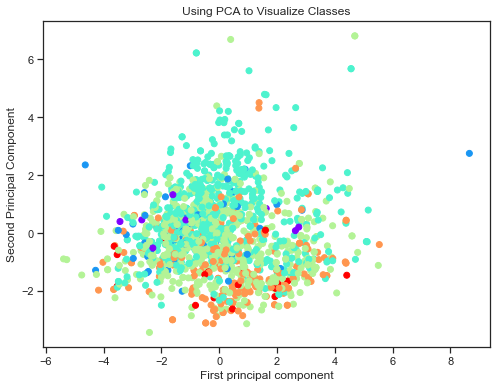

In [68]:
from sklearn.preprocessing import StandardScaler
pdX_pca = pdX.copy()
pdY_pca = pdY.copy()
pdY_pca = pdY_pca.astype(float)

pdX_pca.tail()

pdX_pca = StandardScaler().fit_transform(pdX_pca)

pca = PCA(n_components=2)
pdX_pca = pca.fit_transform(pdX_pca)

pdX_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(pdX_pca[:,0],pdX_pca[:,1],c=pdY_pca['quality'],cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

In [69]:
print("components: ", pca.components_, "\n")
print("explained variance: ", pca.explained_variance_, "\n")
exp_var_rat = pca.explained_variance_ratio_
print("explained variance ratio: ", exp_var_rat)

components:  [[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
   0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]
 [-0.11050274  0.27493048 -0.15179136  0.27208024  0.14805156  0.51356681
   0.56948696  0.23357549  0.00671079 -0.03755392 -0.38618096]] 

explained variance:  [3.10107182 1.92711489] 

explained variance ratio:  [0.28173931 0.1750827 ]


<AxesSubplot:>

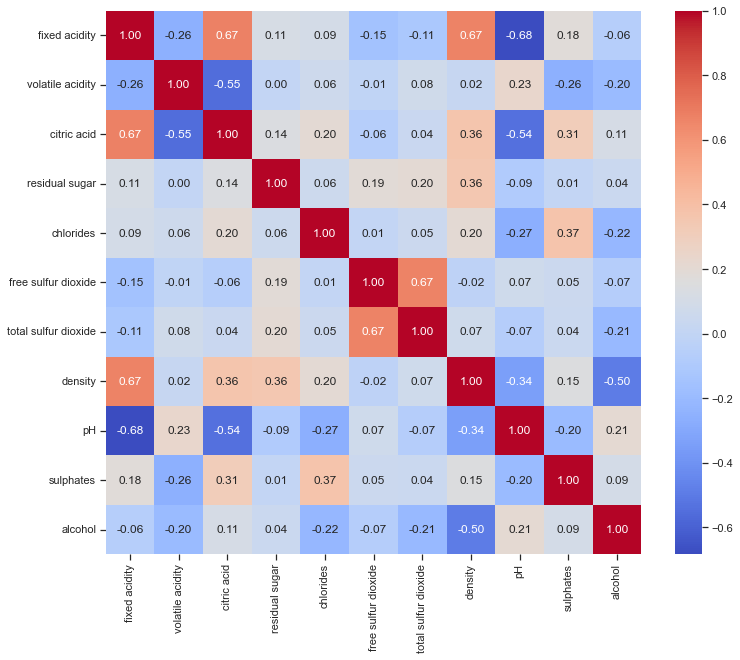

In [71]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(pdX.corr(),annot=True, cmap='coolwarm',fmt='.2f')